=== 不良率与宏观指标相关性 ===
商品房销售面积增速(%)   -0.266581
GDP增速(%)       -0.238943
M2增速(%)        -0.144236
不良率(%)          1.000000
Name: 不良率(%), dtype: float64
Day5完成！回归图已保存到桌面


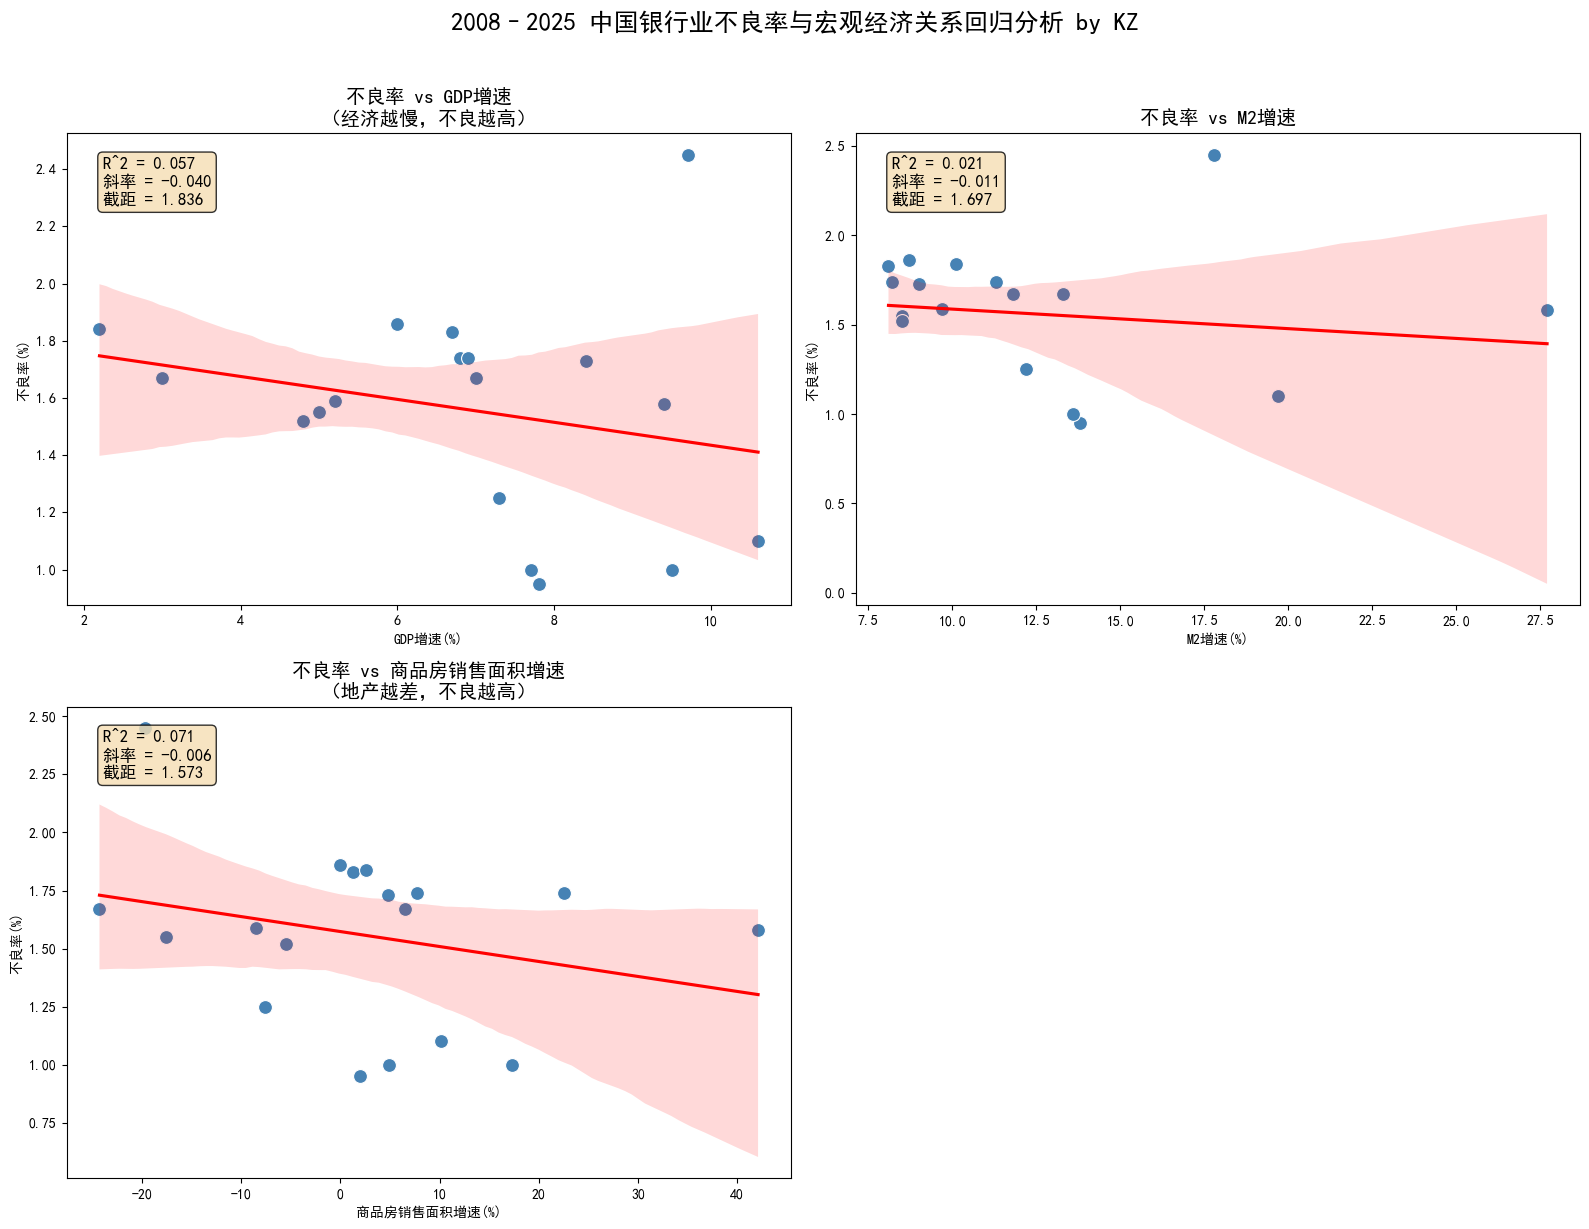

In [21]:
# Day5：银行业不良率与宏观经济回归分析  —— by KZ
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress   # 线性回归

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'

# 2008–2025年中国银行业不良率与宏观数据（来源：银保监会、统计局、Wind）
data = [
    {"年份": 2008, "不良率(%)": 2.45, "GDP增速(%)": 9.7,  "M2增速(%)": 17.8, "商品房销售面积增速(%)": -19.7},
    {"年份": 2009, "不良率(%)": 1.58, "GDP增速(%)": 9.4,  "M2增速(%)": 27.7, "商品房销售面积增速(%)": 42.1},
    {"年份": 2010, "不良率(%)": 1.10, "GDP增速(%)": 10.6, "M2增速(%)": 19.7, "商品房销售面积增速(%)": 10.1},
    {"年份": 2011, "不良率(%)": 1.00, "GDP增速(%)": 9.5,  "M2增速(%)": 13.6, "商品房销售面积增速(%)": 4.9},
    {"年份": 2012, "不良率(%)": 0.95, "GDP增速(%)": 7.8,  "M2增速(%)": 13.8, "商品房销售面积增速(%)": 2.0},
    {"年份": 2013, "不良率(%)": 1.00, "GDP增速(%)": 7.7,  "M2增速(%)": 13.6, "商品房销售面积增速(%)": 17.3},
    {"年份": 2014, "不良率(%)": 1.25, "GDP增速(%)": 7.3,  "M2增速(%)": 12.2, "商品房销售面积增速(%)": -7.6},
    {"年份": 2015, "不良率(%)": 1.67, "GDP增速(%)": 7.0,  "M2增速(%)": 13.3, "商品房销售面积增速(%)": 6.5},
    {"年份": 2016, "不良率(%)": 1.74, "GDP增速(%)": 6.8,  "M2增速(%)": 11.3, "商品房销售面积增速(%)": 22.5},
    {"年份": 2017, "不良率(%)": 1.74, "GDP增速(%)": 6.9,  "M2增速(%)": 8.2,  "商品房销售面积增速(%)": 7.7},
    {"年份": 2018, "不良率(%)": 1.83, "GDP增速(%)": 6.7,  "M2增速(%)": 8.1,  "商品房销售面积增速(%)": 1.3},
    {"年份": 2019, "不良率(%)": 1.86, "GDP增速(%)": 6.0,  "M2增速(%)": 8.7,  "商品房销售面积增速(%)": -0.1},
    {"年份": 2020, "不良率(%)": 1.84, "GDP增速(%)": 2.2,  "M2增速(%)": 10.1, "商品房销售面积增速(%)": 2.6},
    {"年份": 2021, "不良率(%)": 1.73, "GDP增速(%)": 8.4,  "M2增速(%)": 9.0,  "商品房销售面积增速(%)": 4.8},
    {"年份": 2022, "不良率(%)": 1.67, "GDP增速(%)": 3.0,  "M2增速(%)": 11.8, "商品房销售面积增速(%)": -24.3},
    {"年份": 2023, "不良率(%)": 1.59, "GDP增速(%)": 5.2,  "M2增速(%)": 9.7,  "商品房销售面积增速(%)": -8.5},
    {"年份": 2024, "不良率(%)": 1.55, "GDP增速(%)": 5.0,  "M2增速(%)": 8.5,  "商品房销售面积增速(%)": -17.6},
    {"年份": 2025, "不良率(%)": 1.52, "GDP增速(%)": 4.8,  "M2增速(%)": 8.5,  "商品房销售面积增速(%)": -5.5},  # 2025Q3
]

df = pd.DataFrame(data)
df = df.set_index('年份')

# 1. 打印相关性矩阵（一眼看出谁和不良率关系最强）
print("=== 不良率与宏观指标相关性 ===")
print(df.corr()['不良率(%)'].sort_values())

# 2. 四张散点图 + 线性回归线（核心可视化）
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

def scatter_reg(ax, x_col, title):
    sns.scatterplot(data=df, x=x_col, y='不良率(%)', ax=ax, s=100, color='steelblue')
    sns.regplot(data=df, x=x_col, y='不良率(%)', ax=ax, scatter=False, color='red')
    
    # 计算回归系数
    slope, intercept, r_value, _, _ = linregress(df[x_col], df['不良率(%)'])
    ax.text(0.05, 0.95, f'R^2 = {r_value**2:.3f}\n斜率 = {slope:.3f}\n截距 = {intercept:.3f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('不良率(%)')

scatter_reg(axes[0,0], 'GDP增速(%)', '不良率 vs GDP增速\n（经济越慢，不良越高）')
scatter_reg(axes[0,1], 'M2增速(%)', '不良率 vs M2增速')
scatter_reg(axes[1,0], '商品房销售面积增速(%)', '不良率 vs 商品房销售面积增速\n（地产越差，不良越高）')

# 隐藏第4张空图
axes[1,1].axis('off')

plt.suptitle('2008–2025 中国银行业不良率与宏观经济关系回归分析 by KZ', fontsize=18, y=1.02)
plt.tight_layout()

# 保存
plt.savefig('C:/Users/Administrator/Desktop/Day5-不良率宏观回归分析.png', dpi=300, bbox_inches='tight')
df.to_excel('C:/Users/Administrator/Desktop/Day5-不良率与宏观数据.xlsx')
print("Day5完成！回归图已保存到桌面")

plt.show()